In [1]:
# Deep Learning

In [2]:
# Import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

11493376/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, '0')

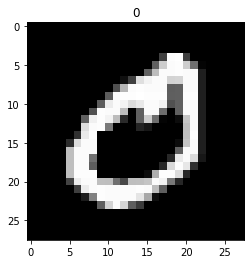

In [3]:
# Obtenção de dados e divisão automática entre treino e teste
(x_treina, y_treina), (x_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(x_treina[21], cmap = 'gray')
plt.title(y_treina[21])

In [4]:
# Mudança de dimensão, originalmente está 28x28 e precisamos 784
x_treina = x_treina.reshape((len(x_treina), np.prod(x_treina.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
x_treina = x_treina.astype('float32')
x_teste = x_teste.astype('float32')

In [6]:
# Normalização(255 é o valor máximo de um pixel)
x_treina /= 255
x_teste /= 255

In [7]:
# Transformação para o modelo dummy, temos 10 classes
y_treina = np_utils.to_categorical(y_treina, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neuronios, para evitar overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
# camada de saída, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [9]:
# Visualizaçao da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [11]:
# Configuração dos parâmetros da rede neural e treinamento(utilizando base de dados de validação)
# Na variável historico temos os históricos das execuções(erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treina, y_treina, epochs = 20, validation_data = (x_teste, y_teste))               

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7247 - accuracy: 0.7704 - val_loss: 0.1627 - val_accuracy: 0.9519
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2381 - accuracy: 0.9300 - val_loss: 0.1233 - val_accuracy: 0.9618
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1835 - accuracy: 0.9481 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1598 - accuracy: 0.9526 - val_loss: 0.1118 - val_accuracy: 0.9673
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1448 - accuracy: 0.9580 - val_loss: 0.0995 - val_accuracy: 0.9708
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1365 - accuracy: 0.9596 - val_loss: 0.1024 - val_accuracy: 0.9702
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1261 - accuracy: 0.9610 - val_loss: 0.0994 - val_accuracy:

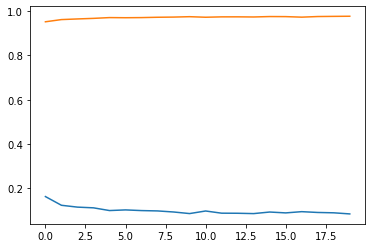

In [12]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
# evolução do erro, azul
plt.plot(historico.history['val_loss'])
# performance da rede
plt.plot(historico.history['val_accuracy'])

In [13]:
# Obtenção das previsões
previsoes = modelo.predict(x_teste)
previsoes

array([[5.49160439e-11, 8.96567875e-10, 2.36796905e-06, ...,
        9.99988437e-01, 2.95127089e-10, 7.11162420e-06],
       [8.42058867e-08, 9.98704135e-03, 9.89490688e-01, ...,
        7.12728506e-05, 2.34484833e-05, 2.13984164e-09],
       [1.29312455e-11, 9.99990702e-01, 2.44528859e-08, ...,
        1.37891732e-06, 5.93354935e-06, 1.52442747e-09],
       ...,
       [4.55160974e-13, 2.35206965e-10, 4.32531380e-08, ...,
        1.58795530e-07, 2.02305915e-11, 7.71347823e-06],
       [1.05221535e-11, 8.36942142e-14, 3.60569409e-12, ...,
        2.08141039e-11, 4.23618030e-09, 2.47884629e-11],
       [1.54137828e-10, 2.83867909e-15, 9.62694226e-13, ...,
        3.07162354e-18, 1.28301701e-11, 5.30231666e-16]], dtype=float32)

In [14]:
# valor maximo(com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 965,    0,    0,    1,    2,    1,    5,    2,    3,    1],
       [   0, 1124,    1,    2,    0,    2,    2,    0,    4,    0],
       [   3,    3, 1009,    5,    3,    0,    4,    2,    3,    0],
       [   0,    0,    3,  988,    0,   11,    0,    3,    4,    1],
       [   0,    0,    3,    0,  966,    0,    5,    2,    0,    6],
       [   0,    0,    0,    6,    2,  867,    6,    2,    6,    3],
       [   3,    3,    0,    1,    4,    3,  942,    0,    2,    0],
       [   1,    8,   11,    3,    4,    0,    0,  997,    0,    4],
       [   5,    1,    4,    3,    4,    2,    2,    6,  943,    4],
       [   2,    3,    1,    6,   19,    3,    1,    5,    1,  968]])

In [15]:
# Previsão com um novo registro, convertendo um array para o formato de matriz
# numero 4
y_treina[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
# passo a mesma posicao para o modelo prever
novo = x_treina[20]
# de matriz para vetos
novo = np.expand_dims(novo, axis = 0)
# previsao
pred = modelo.predict(novo)
# maior valor
pred = [np.argmax(t) for t in pred]
pred

[4]